In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mm = pd.read_excel("military_spend_full.xlsx")

In [3]:
mm = mm.replace('Appenzell Ausserrhoden', 'Appenzell A.-Rh.')
mm = mm.replace('Appenzell Innerrhoden', 'Appenzell I.-Rh.')

In [4]:
for k in range(0, len(mm.Kanton.unique())):
    globals()["a_" + str(k)] = mm[mm.Kanton == mm.Kanton.unique()[k]][["Decision", "Topic"]]
    globals()["a_" + str(k)] = globals()["a_" + str(k)].rename(columns = {"Decision": mm.Kanton.unique()[k]})

In [5]:
decs = pd.merge(left = a_0, right = a_1, on = "Topic")
for k in range(2, len(mm.Kanton.unique())):
    decs = pd.merge(left = decs, right = globals()["a_" + str(k)], on = "Topic")

In [6]:
decs[:2]

,Zürich,Topic,Bern,Luzern,Uri,Schwyz,Obwalden,Nidwalden,Glarus,Zug,...,Graubünden,Aargau,Thurgau,Tessin,Waadt,Wallis,Neuenburg,Genf,Schweiz,Jura
0,Nein,für einen echten Zivildienst auf der Grundlage...,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,...,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Ja,Nein,Nein
1,Nein,für die Mitsprache des Volkes bei Militärausga...,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Nein,...,Nein,Nein,Nein,Nein,Nein,Nein,Nein,Ja,Nein,Ja


In [53]:
decs = decs.replace("Ja", 1)
decs = decs.replace("Nein", 0)

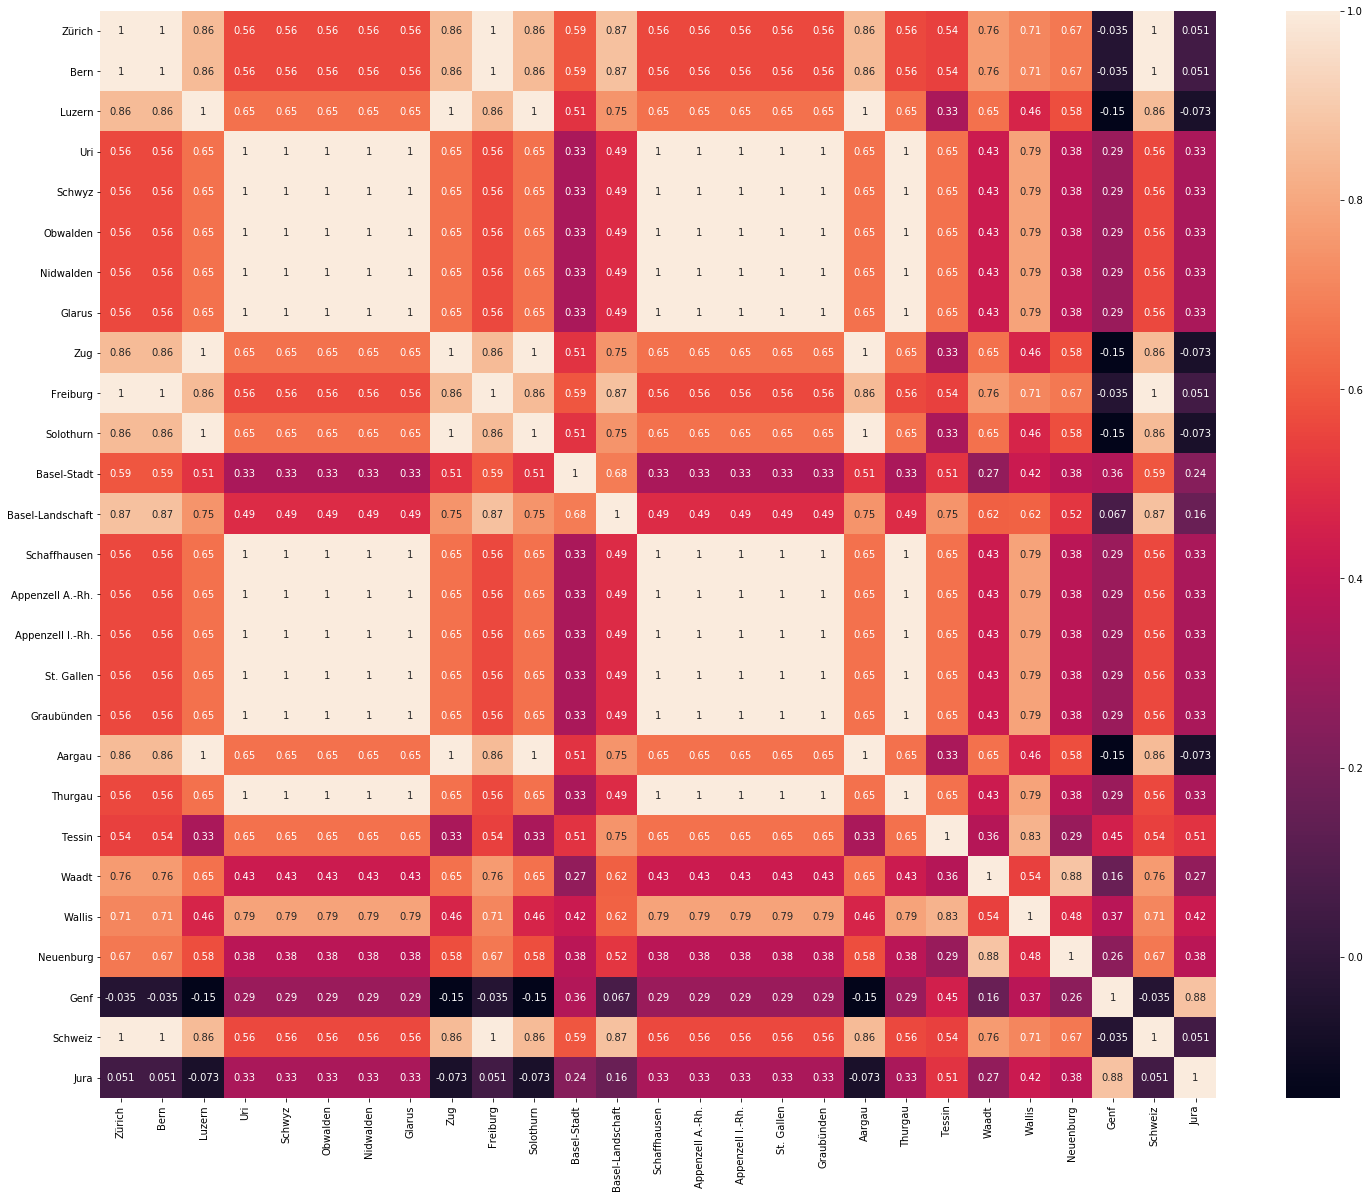

In [58]:
fig, ax = plt.subplots(figsize = (25, 20))
sns.heatmap(decs.drop(columns = "Topic").corr(), ax = ax, annot = True)
plt.show()

In [63]:
decs.drop(columns = "Topic").corr().min()

Zürich             -0.034816
Bern               -0.034816
Luzern             -0.149071
Uri                 0.292770
Schwyz              0.292770
Obwalden            0.292770
Nidwalden           0.292770
Glarus              0.292770
Zug                -0.149071
Freiburg           -0.034816
Solothurn          -0.149071
Basel-Stadt         0.238095
Basel-Landschaft    0.066667
Schaffhausen        0.292770
Appenzell A.-Rh.    0.292770
Appenzell I.-Rh.    0.292770
St. Gallen          0.292770
Graubünden          0.292770
Aargau             -0.149071
Thurgau             0.292770
Tessin              0.288675
Waadt               0.162650
Wallis              0.372104
Neuenburg           0.258199
Genf               -0.149071
Schweiz            -0.034816
Jura               -0.072739
dtype: float64